<a href="https://colab.research.google.com/github/tselane2110/Breast-Cancer-Prediction/blob/main/BreastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Principal Component Analysis (PCA)

The steps involved are:

1. Convert the given df into a numpy array (matrix).
2. Perform mean-centralization on the resultant matrix.
3. Create a covariance matrix
4. Calculate the eigenvalue(s) "lambda" by solving the characterisitic polynomial :
                      (A - (lambda * I))
5. Sort the eigenvalues in desecending order. Choose the top 'z' number of eigenvalues where 'z' is the number of reduced dimensions (number of dimensions you wanted to reduced your initial dataset/dataframe into).
5. Find the eigenvector(s) for the chosen 'z' number of eigenvalues by solving:
                      A * V = lambda * V
                 where :
                       A -> covariance matrix
                       V -> eigenvector to find
                  lambda -> eigenvalue for the eigenvector V

7. Find the project matrix Ap as:
                      Ap = A*V
                  where :
                       V -> [V1/||V1|| V2/||V2|| ... Vn/||Vn||]
               and ||V|| -> L2-norm of V
            L2-norm of V -> sqrt(v1^2 + v2^2 + ... + vn^2)
8. Convert Ap to a DataFrame-column
9. Return the resultant Dataframe-column




In [ ]:
# this cell was taking forever to execute
# import numpy as np
# from numpy.linalg import det
# import sympy as sp              # Symbolic calculation (using sympy for readability)

# def mean_centralize(X):
#   X -= X.mean(axis=0)
#   return X

# def get_eigenValues(A):
#   λ = sp.symbols('λ')
#   A_sym = sp.Matrix(A)
#   char_poly = (A_sym - λ*sp.eye(A.shape[0])).det()
#   print("Characteristic polynomial:", char_poly)

#   # Solve for eigenvalues
#   eigenvalues = sp.solve(char_poly, λ)
#   print("Eigenvalues:", eigenvalues)

#   return eigenvalues

# def calculate_eigenvectors(eigenvalues, A):
#   # Calculate eigenvectors
#   eigenvectors = []

#   for lam in eigenvalues:
#       # Solve (A - λI)v = 0
#       M = A - lam * np.eye(A.shape[0])

#       # Use SVD to find null space
#       _, _, vh = np.linalg.svd(M)
#       v = vh[-1]  # last row of V^H gives a vector in the null space
#       v = v / np.linalg.norm(v)  # normalize
#       eigenvectors.append(v)
#   eigenvectors = np.array(eigenvectors)
#   print(eigenvectors)
#   return eigenvectors


# def PCA(df, n):
#   """
#   df -> input dataframe
#   n -> number of dimensions to reduce into
#   return -> reduced dataframe (df)
#   """
#   # converting df to a numpy_array
#   X = df.to_numpy()

#   # mean-centralizin X
#   X_centered = mean_centralize(X)

#   # getting the covariance matrix
#   cov_matrix = np.cov(X_centered, rowvar=False)

#   # calculating eigenvalues:
#   eigenvalues = get_eigenValues(cov_matrix)

#   # sorting the eigenvalues in decending order
#   eigenvalues.sort()
#   eigenvalues = eigenvalues[::-1]  # in-place sort then reverse

#   # choosing 'n' number of highest eigenvalues to find their respective eigenvectors
#   chosen_eigenvalues = eigenvalues[:n]

#   # finding the eigenvectors for the chosen_eigenvalues
#   eigenvectors = calculate_eigenvectors(chosen_eigenvalues, cov_matrix)

#   # Normalize each eigenvector (L2 norm)
#   V = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

#   # calculating the projected matrix
#   Ap = X_centered @ V

#   # converting Ap to a df again
#   Ap_df = pd.DataFrame(Ap, columns=[f'PC{i+1}' for i in range(Ap.shape[1])])

#   # returning the result
#   return Ap_df


In [ ]:
import numpy as np

def PCA(df, n):
  X = df.to_numpy()
  # Step 1: Mean-center
  X_centered = X - np.mean(X, axis=0)

  # Step 2: Covariance matrix
  A = np.cov(X_centered, rowvar=False)

  # Compute eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(A)

  # Sort eigenvalues (and corresponding eigenvectors) in descending order
  idx = np.argsort(eigenvalues)[::-1]  # indices for sorting largest first
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  # Choose how many eigenvectors you want
  eigenvalues = eigenvalues[:n]
  eigenvectors = eigenvectors[:, :n]

  # Normalize each eigenvector (L2 norm)
  V = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

  # calculating the projected matrix
  Ap = X_centered @ V

  # converting Ap to a df again
  Ap_df = pd.DataFrame(Ap, columns=[f'PC{i+1}' for i in range(Ap.shape[1])])

  # returning the result
  return Ap_df

## Code for Classification Models:

- Logistic Regression
- Support Vector Machine (used when features are no linearly related to each other)
- Decision Tree
- Naive Bayes (assumes that features are independent of each other)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
class ClassificationModels():
    def decisionTree(self, x, y):
        from sklearn.tree import DecisionTreeClassifier
        x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=1, stratify=y)
        clf=DecisionTreeClassifier(criterion="entropy", max_depth=3)
        clf=clf.fit(x_train, y_train)
        y_pred=clf.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        print('classification report : \n', classification_report(y_test, y_pred))
        print('\nconfusion matrix: \n',cm)
        print("\naccuracy : ", accuracy_score(y_test, y_pred))
    def logisticRegression(self, x, y):
        from sklearn.linear_model import LogisticRegression
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
        logreg = LogisticRegression()
        logreg.fit(x_train, y_train)
        y_pred=logreg.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        print('classification report : \n', classification_report(y_test, y_pred))
        print('\nconfusion matrix: \n',cm)
        print("\naccuracy : ", accuracy_score(y_test, y_pred))
    def naiveBayes(self, x,y):
        from sklearn.naive_bayes import GaussianNB
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
        clf=GaussianNB()
        clf=clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        print('classification report : \n', classification_report(y_test, y_pred))
        print('\nconfusion matrix: \n',cm)
        print("\naccuracy : ", accuracy_score(y_test, y_pred))
    def svm(self, x,y):
        from sklearn.svm import SVC
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
        clf = SVC(kernel='linear')
        clf.fit(x_train, y_train)
        y_pred=clf.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        print('classification report : \n', classification_report(y_test, y_pred))
        print('\nconfusion matrix: \n',cm)
        print("\naccuracy : ", accuracy_score(y_test, y_pred))

## Importing the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

This dataset is already clean, which means that it does not have any missing value or redundant data.

Class distribution: 357 benign, 212 malignant

In [ ]:
path = "/kaggle/input/breast-cancer-wisconsin-data/data.csv"
df = pd.read_csv(path)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df['Unnamed: 32'].isnull().sum()

np.int64(569)

In [ ]:
df.drop("Unnamed: 32", axis = 1, inplace = True)
# axis = 1 represents column
# inplace = True means, make the changes in the actual 'df'

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Deleting 'id' column

In [ ]:
df.drop('id', axis = 1, inplace = True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Removing the target column "diagnosis' from the middle of the df and appending it to the end

In [ ]:
df_target = df['diagnosis']
df.drop('diagnosis', axis = 1, inplace= True)
df['diagnosis'] = df_target
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


## Finding Correlation Among The Variables

In [ ]:
cols = list(df.columns)
cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis']

In [ ]:
cols_unique = {}
for i in range(len(cols)):
  cols_unique[cols[i]] = len(df[cols[i]].unique())
cols_unique

{'radius_mean': 456,
 'texture_mean': 479,
 'perimeter_mean': 522,
 'area_mean': 539,
 'smoothness_mean': 474,
 'compactness_mean': 537,
 'concavity_mean': 537,
 'concave points_mean': 542,
 'symmetry_mean': 432,
 'fractal_dimension_mean': 499,
 'radius_se': 540,
 'texture_se': 519,
 'perimeter_se': 533,
 'area_se': 528,
 'smoothness_se': 547,
 'compactness_se': 541,
 'concavity_se': 533,
 'concave points_se': 507,
 'symmetry_se': 498,
 'fractal_dimension_se': 545,
 'radius_worst': 457,
 'texture_worst': 511,
 'perimeter_worst': 514,
 'area_worst': 544,
 'smoothness_worst': 411,
 'compactness_worst': 529,
 'concavity_worst': 539,
 'concave points_worst': 492,
 'symmetry_worst': 500,
 'fractal_dimension_worst': 535,
 'diagnosis': 2}

From the above line of code (LOC) we learn that the data is numerical and cant be categorized.

## Performing Binary Encoding to the diagnosis column

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
cols_cor = {}
for i in range(len(cols)):
  cols_cor[cols[i]] = df[cols[i]].corr(df['diagnosis'])
cols_cor

{'radius_mean': np.float64(0.7300285113754558),
 'texture_mean': np.float64(0.4151852998452037),
 'perimeter_mean': np.float64(0.742635529725832),
 'area_mean': np.float64(0.7089838365853891),
 'smoothness_mean': np.float64(0.3585599650859316),
 'compactness_mean': np.float64(0.5965336775082525),
 'concavity_mean': np.float64(0.6963597071719048),
 'concave points_mean': np.float64(0.7766138400204349),
 'symmetry_mean': np.float64(0.33049855426254654),
 'fractal_dimension_mean': np.float64(-0.012837602698432366),
 'radius_se': np.float64(0.5671338208247165),
 'texture_se': np.float64(-0.008303332973877427),
 'perimeter_se': np.float64(0.5561407034314825),
 'area_se': np.float64(0.5482359402780237),
 'smoothness_se': np.float64(-0.06701601057948728),
 'compactness_se': np.float64(0.29299924424885804),
 'concavity_se': np.float64(0.25372976598083014),
 'concave points_se': np.float64(0.40804233271650414),
 'symmetry_se': np.float64(-0.0065217558706479615),
 'fractal_dimension_se': np.floa

Looks ugly, therefore we will use heatmap for the very same purpose!

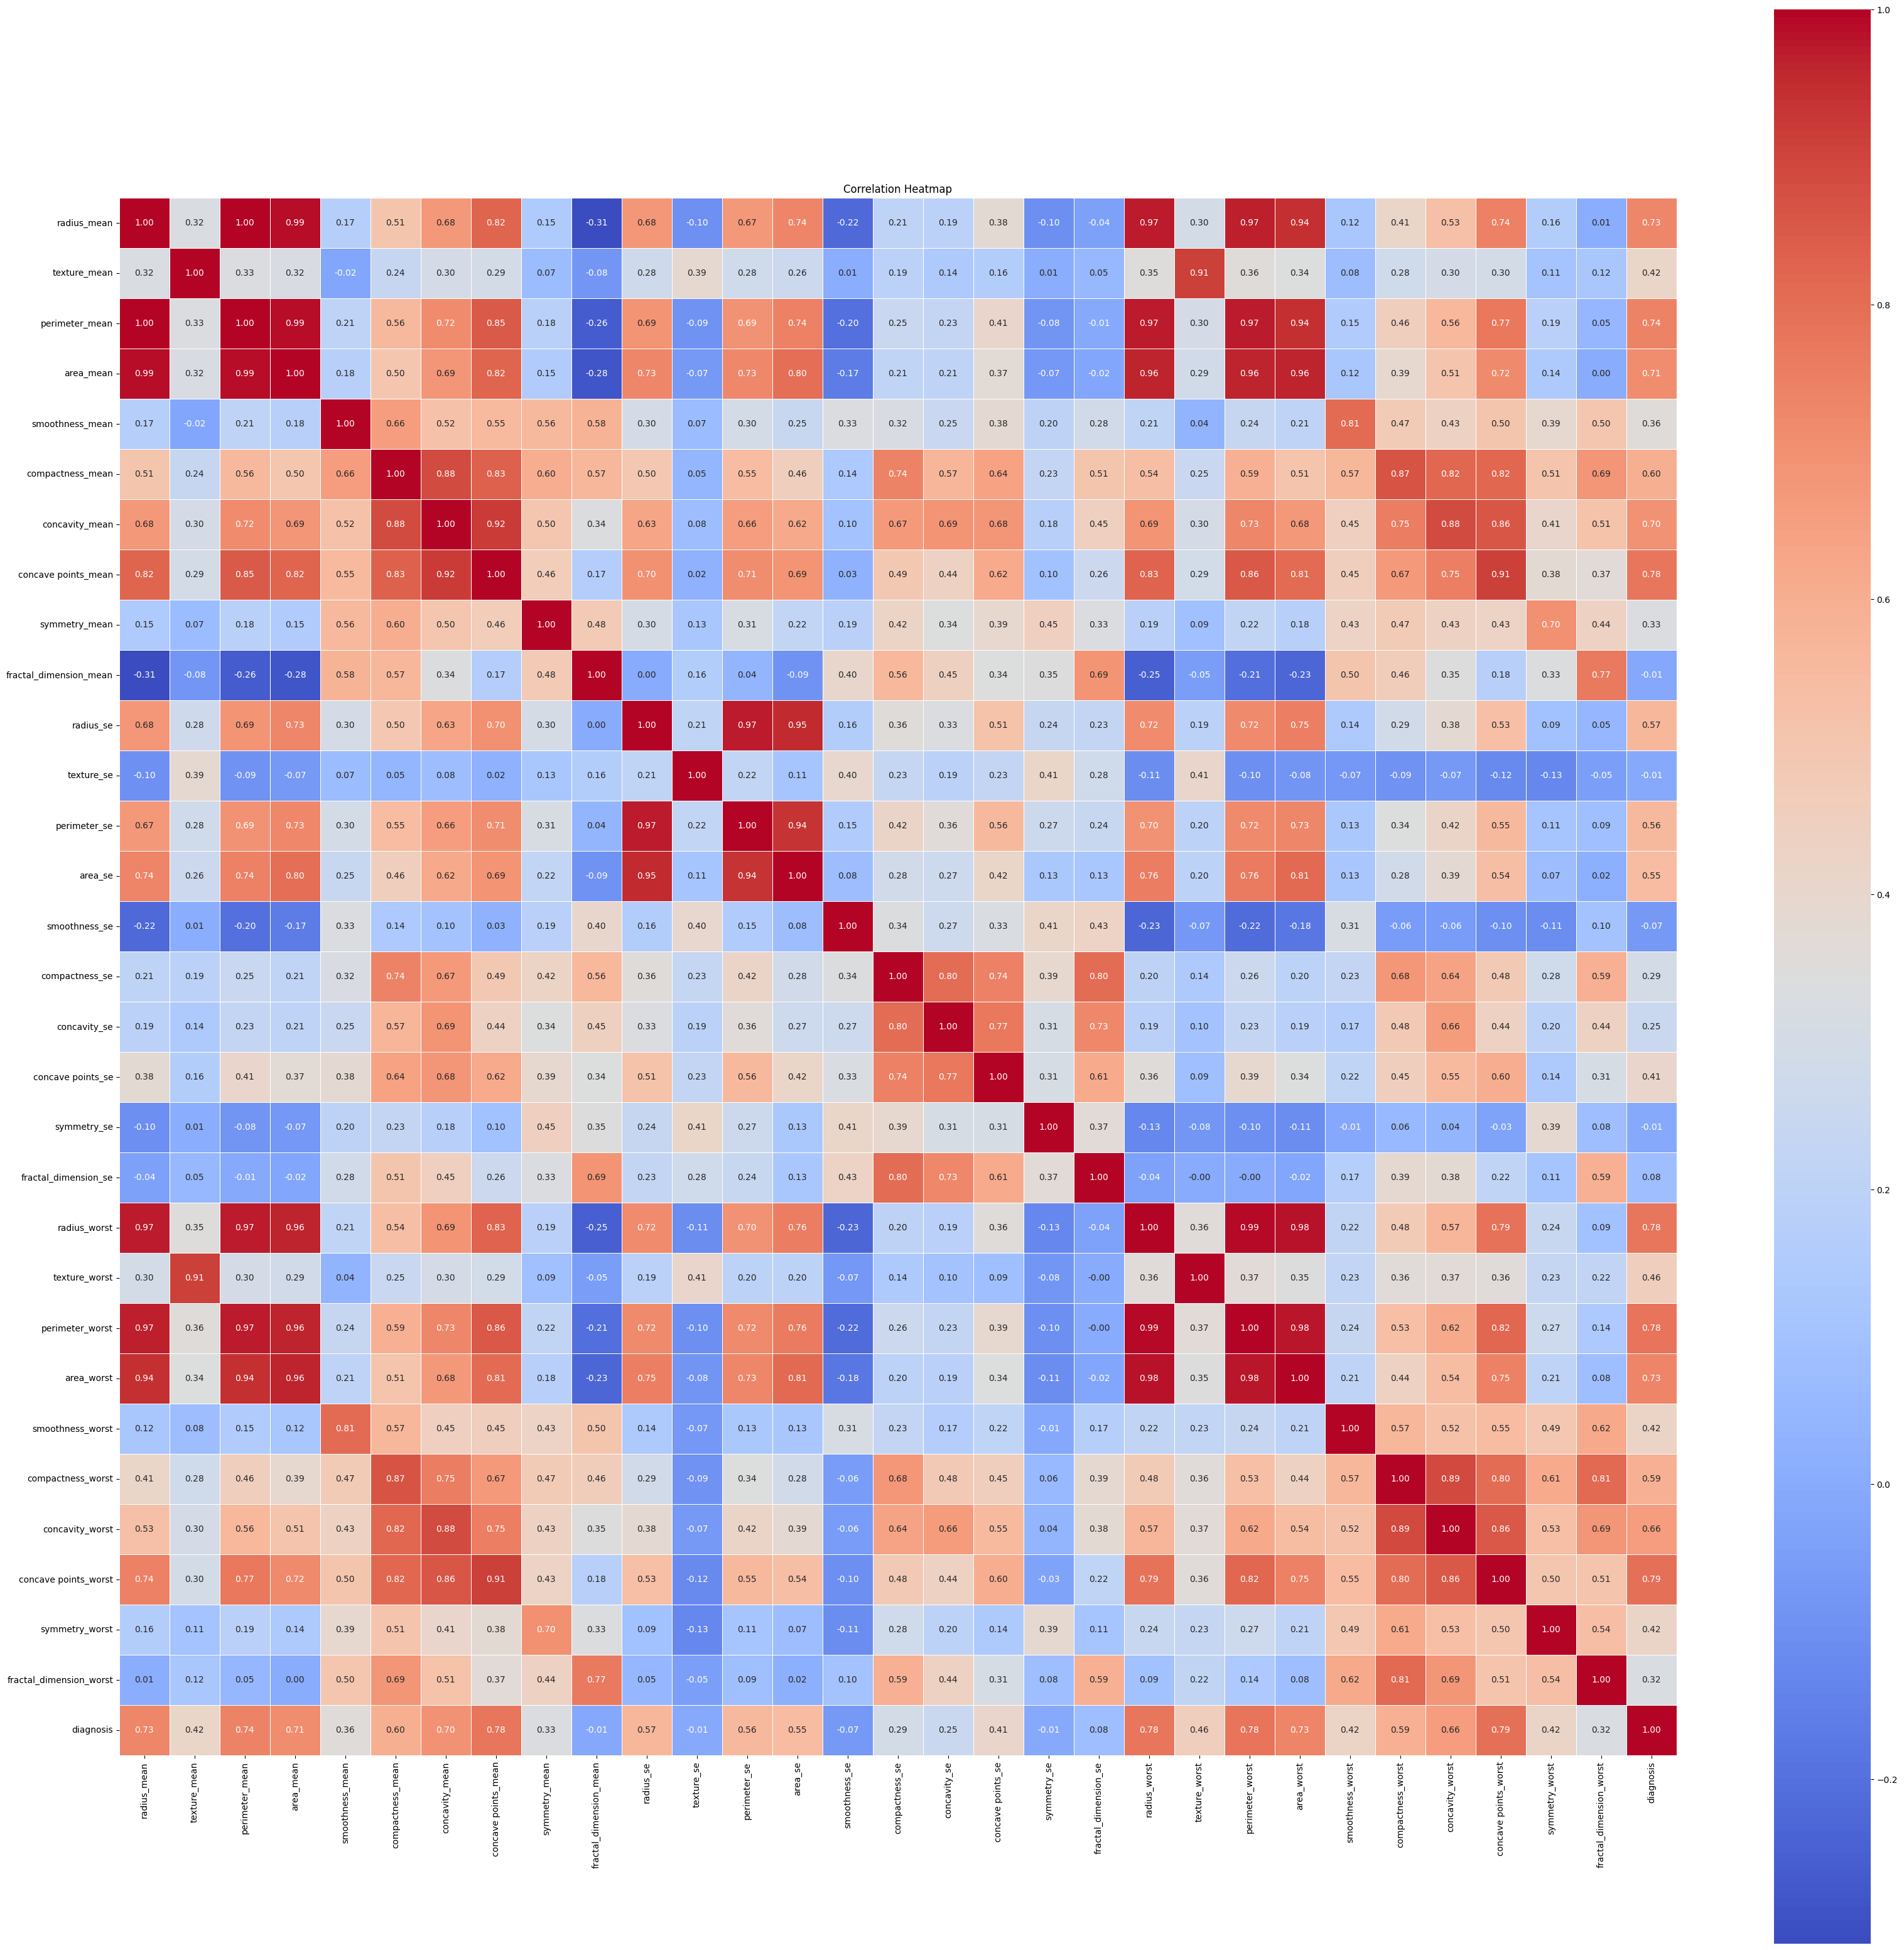

In [ ]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## I aim to train <u>multiple models</u> with different types of datasets:
### Without PCA:
1. The df where I don't delete any columns
2. The df where I keep the columns which have any kind of codependency and I delete the remaining columns
3. The df where I delete the columns where the features have low correlation with the target variable


______________________________
### With PCA:

- Apply PCA to groups of features with **high correlation** (correlation coefficient ≥ 0.70) to reduce redundancy.
- Keep low-correlation features as they are, since they already carry unique information.
- Train the model using a combination of:
  - Low-correlation features (original form)
  - PCA-derived components from high-correlation feature groups

# Model Training Without PCA (I):

### Using dataframa (df) where I don't delete any columns


In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
df1_X = df.drop('diagnosis', axis = 1)
df1_Y = df['diagnosis']

In [ ]:
df1_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df1_Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


## Training models in the following order:

1. Logistic Regression
2. Support Vector Machines
3. Decision Tree
4. Naive Bayes

In [ ]:
models = ClassificationModels()

### 1. Logistic Regression

In [ ]:
logisticRegression = models.logisticRegression(df1_X, df1_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


confusion matrix: 
 [[104   3]
 [  4  60]]

accuracy :  0.9590643274853801


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Support Vector Machine

In [ ]:
svm = models.svm(df1_X, df1_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.97      0.95      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


confusion matrix: 
 [[105   2]
 [  3  61]]

accuracy :  0.9707602339181286


### 3. Decision Tree

In [ ]:
decisionTree = models.decisionTree(df1_X, df1_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       107
           1       0.95      0.81      0.87        64

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171


confusion matrix: 
 [[104   3]
 [ 12  52]]

accuracy :  0.9122807017543859


### 4. Naive Bayes

In [ ]:
naive_bayes = models.naiveBayes(df1_X, df1_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.88      0.89      0.88        64

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171


confusion matrix: 
 [[99  8]
 [ 7 57]]

accuracy :  0.9122807017543859


## Conclusion for this training session

The main goal of our problem statement is to reduce the number of False Negatives, which means we have to increase the Recall for class 1 (even if it decreases precision a bit).

In terms of **recall** (Sensitivity OR True Positive Rate) for class 1, two models performed well:

1. SVM is giving 95% recall for class 1, which means that we have 5% of False Negatives in this model's predictions.

2. Logistic Regression is giving 94% recall for class 1, which means that we have 6% of False Negatives in this model's predictions.

<u>Advice from chatgpt</u>:

* Adjust decision threshold to favor recall

* Use class weighting or oversampling to give more importance to malignant cases

* Explore ROC-AUC to evaluate overall separability

# Model Training Without PCA (II):

### Using dataframa (df) where I keep the columns which have any kind of codependency and I delete the remaining columns

In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## Dropping Columns

Using the heatmap, I analyzed the correlation between different features and found out that the following <u>four</u> features are not highly correlated (less than 50% correlation) to any other features:

* texture_mean
* texture_se
* smoothness_se
* symmetry_se

Therefore, I will be dropping all of these four columns.

In [ ]:
ls_drop_cols = ['texture_mean', 'texture_se', 'smoothness_se', 'symmetry_se']
df2 = df.drop(ls_drop_cols, axis = 1)
df2

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
df2_X = df2.drop('diagnosis', axis = 1)
df2_Y = df2['diagnosis']

## Training models in the following order:

In [ ]:
models = ClassificationModels()

### Logistic Regression

In [ ]:
logisticRegression = models.logisticRegression(df2_X, df2_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.97      0.94      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


confusion matrix: 
 [[105   2]
 [  4  60]]

accuracy :  0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine

In [ ]:
svm = models.svm(df2_X, df2_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


confusion matrix: 
 [[106   1]
 [  4  60]]

accuracy :  0.9707602339181286


### Decision Tree

In [ ]:
decisonTree = models.decisionTree(df2_X, df2_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       107
           1       0.95      0.81      0.87        64

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171


confusion matrix: 
 [[104   3]
 [ 12  52]]

accuracy :  0.9122807017543859


### Naive Bayes

In [ ]:
naiveBayes = models.naiveBayes(df2_X, df2_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.86      0.89      0.88        64

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171


confusion matrix: 
 [[98  9]
 [ 7 57]]

accuracy :  0.9064327485380117


## Conclusion for this training session

Following are the outcomes in comparison with the "without PCA (I)" approach:

* The overall recall for all four models dropped by 1% as SVM previously had achieved a recall of 95% which dropped to 94% this time. The recall for all other models stayed the same.

Therefore, this approach did not benefit us much, as this time we fed comparatively less data (features) than our previous attempt. Hence, we can't be going with this approach even though it was worth a shot!


# Model Training Without PCA (III):

### Using dataframa (df) where I delete the columns where the features have low correlation (less than 40%) with the target variable



### Dropping Columns

We are dropping the following 10 columns (features) as their correlation with the target-feature (diagnosis) is less than 40%:

* fractcal_dimension_worst
* fractal_dimension_se
* symmetry_se
* concavity_se
* compactness_se
* smoothness_se
* texture_se
* fractal_dimension_mean
* symmetry_mean
* smoothness mean

In [ ]:
ls_drop_cols = ['fractal_dimension_worst', 'fractal_dimension_se', 'symmetry_se', 'concavity_se', 'compactness_se',
                'smoothness_se', 'texture_se', 'fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean']
df3 = df.drop(ls_drop_cols, axis = 1)
df3

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,1
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,1
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,1
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,1
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,1
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,1
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,1
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,1


In [ ]:
df3_X = df3.drop('diagnosis', axis = 1)
df3_Y = df3['diagnosis']

## Training models in the following order:

In [ ]:
models = ClassificationModels()

### Logistic Regression

In [ ]:
logisticRegression = models.logisticRegression(df3_X, df3_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


confusion matrix: 
 [[105   2]
 [  5  59]]

accuracy :  0.9590643274853801


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine

In [ ]:
svm = models.svm(df3_X, df3_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       107
           1       0.95      0.95      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


confusion matrix: 
 [[104   3]
 [  3  61]]

accuracy :  0.9649122807017544


### Decision Tree


In [ ]:
decisionTree = models.decisionTree(df3_X, df3_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       107
           1       0.95      0.83      0.88        64

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171


confusion matrix: 
 [[104   3]
 [ 11  53]]

accuracy :  0.9181286549707602


### Naive Bayes

In [ ]:
naiveBayes = models.naiveBayes(df3_X, df3_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.89      0.89      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171


confusion matrix: 
 [[100   7]
 [  7  57]]

accuracy :  0.9181286549707602


## Conclusion for this training session

Following are the outcomes in comparison with the "without PCA (I)" and "without PCA (II)" approach:

* The overall recall is the same as in "without PCA (I)" as:
  1. The recall of Logistic Regression dropped from 94% to 92%
  2. The recall of SVM is 95%
  3. The recall of Decision Tree increased from 81% to 83%
  4. The recall of Naive Bayes stayed 89% (has stayed very consistent throughout the training on different datasets)

</u>**Comparing SVM's Precision and F1-score (balance between recall and precision) from Without_PCA (I) and Without_PCA (II)**</u>

<div align="center">

| Precision  |  Recall    |
|:-----------|:----------:|
| 0.97       | 0.96       |
| 0.95       | 0.95       |

</div>

We can conclude that our 1st SVM model still outperforms all the other SVM models that we trained.

# Model Training With PCA:

### Perform PCA on features that are highly/moderately correlated (atleast 40% correlation) to each other (excluding their correlation with the target feature) and on features that weakly correlated to each other.

- PCA, abbreviation for Principal Component Analysis, is a dimensionality-reduction method.

## Feature Engineering for this dataset

After analyzing the heatmap that we plotted previously during EDA, we saw which features are highly correlation (corr >= 70%), which are moderately correlated (corr >= 40% and less than 70%) and which features have low correlation (corr < 40%).

Our goal is to transform these three types of features into their reduced form (dimension) using PCA.

### 1. For highly correlated features

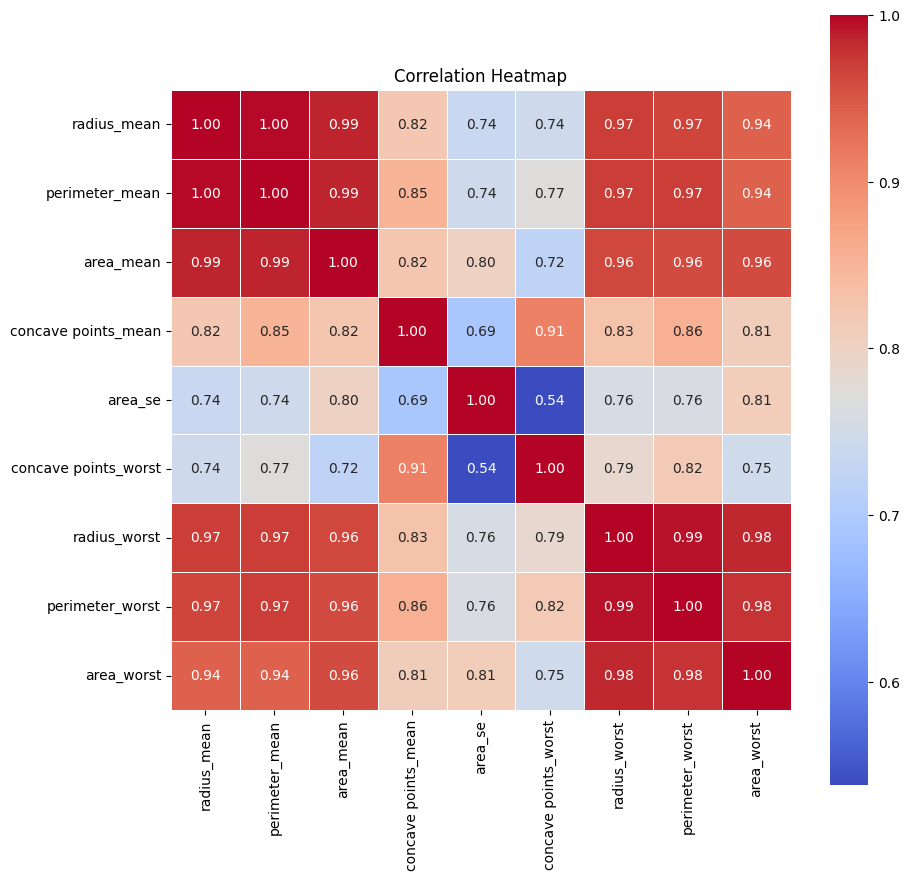

In [ ]:
# heatmap for highly correlated features
cols_highcorr = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
        'area_se', 'concave points_worst', 'radius_worst', 'perimeter_worst', 'area_worst']
df_highcorr = df[cols_highcorr]

# Compute correlation matrix
corr = df_highcorr.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

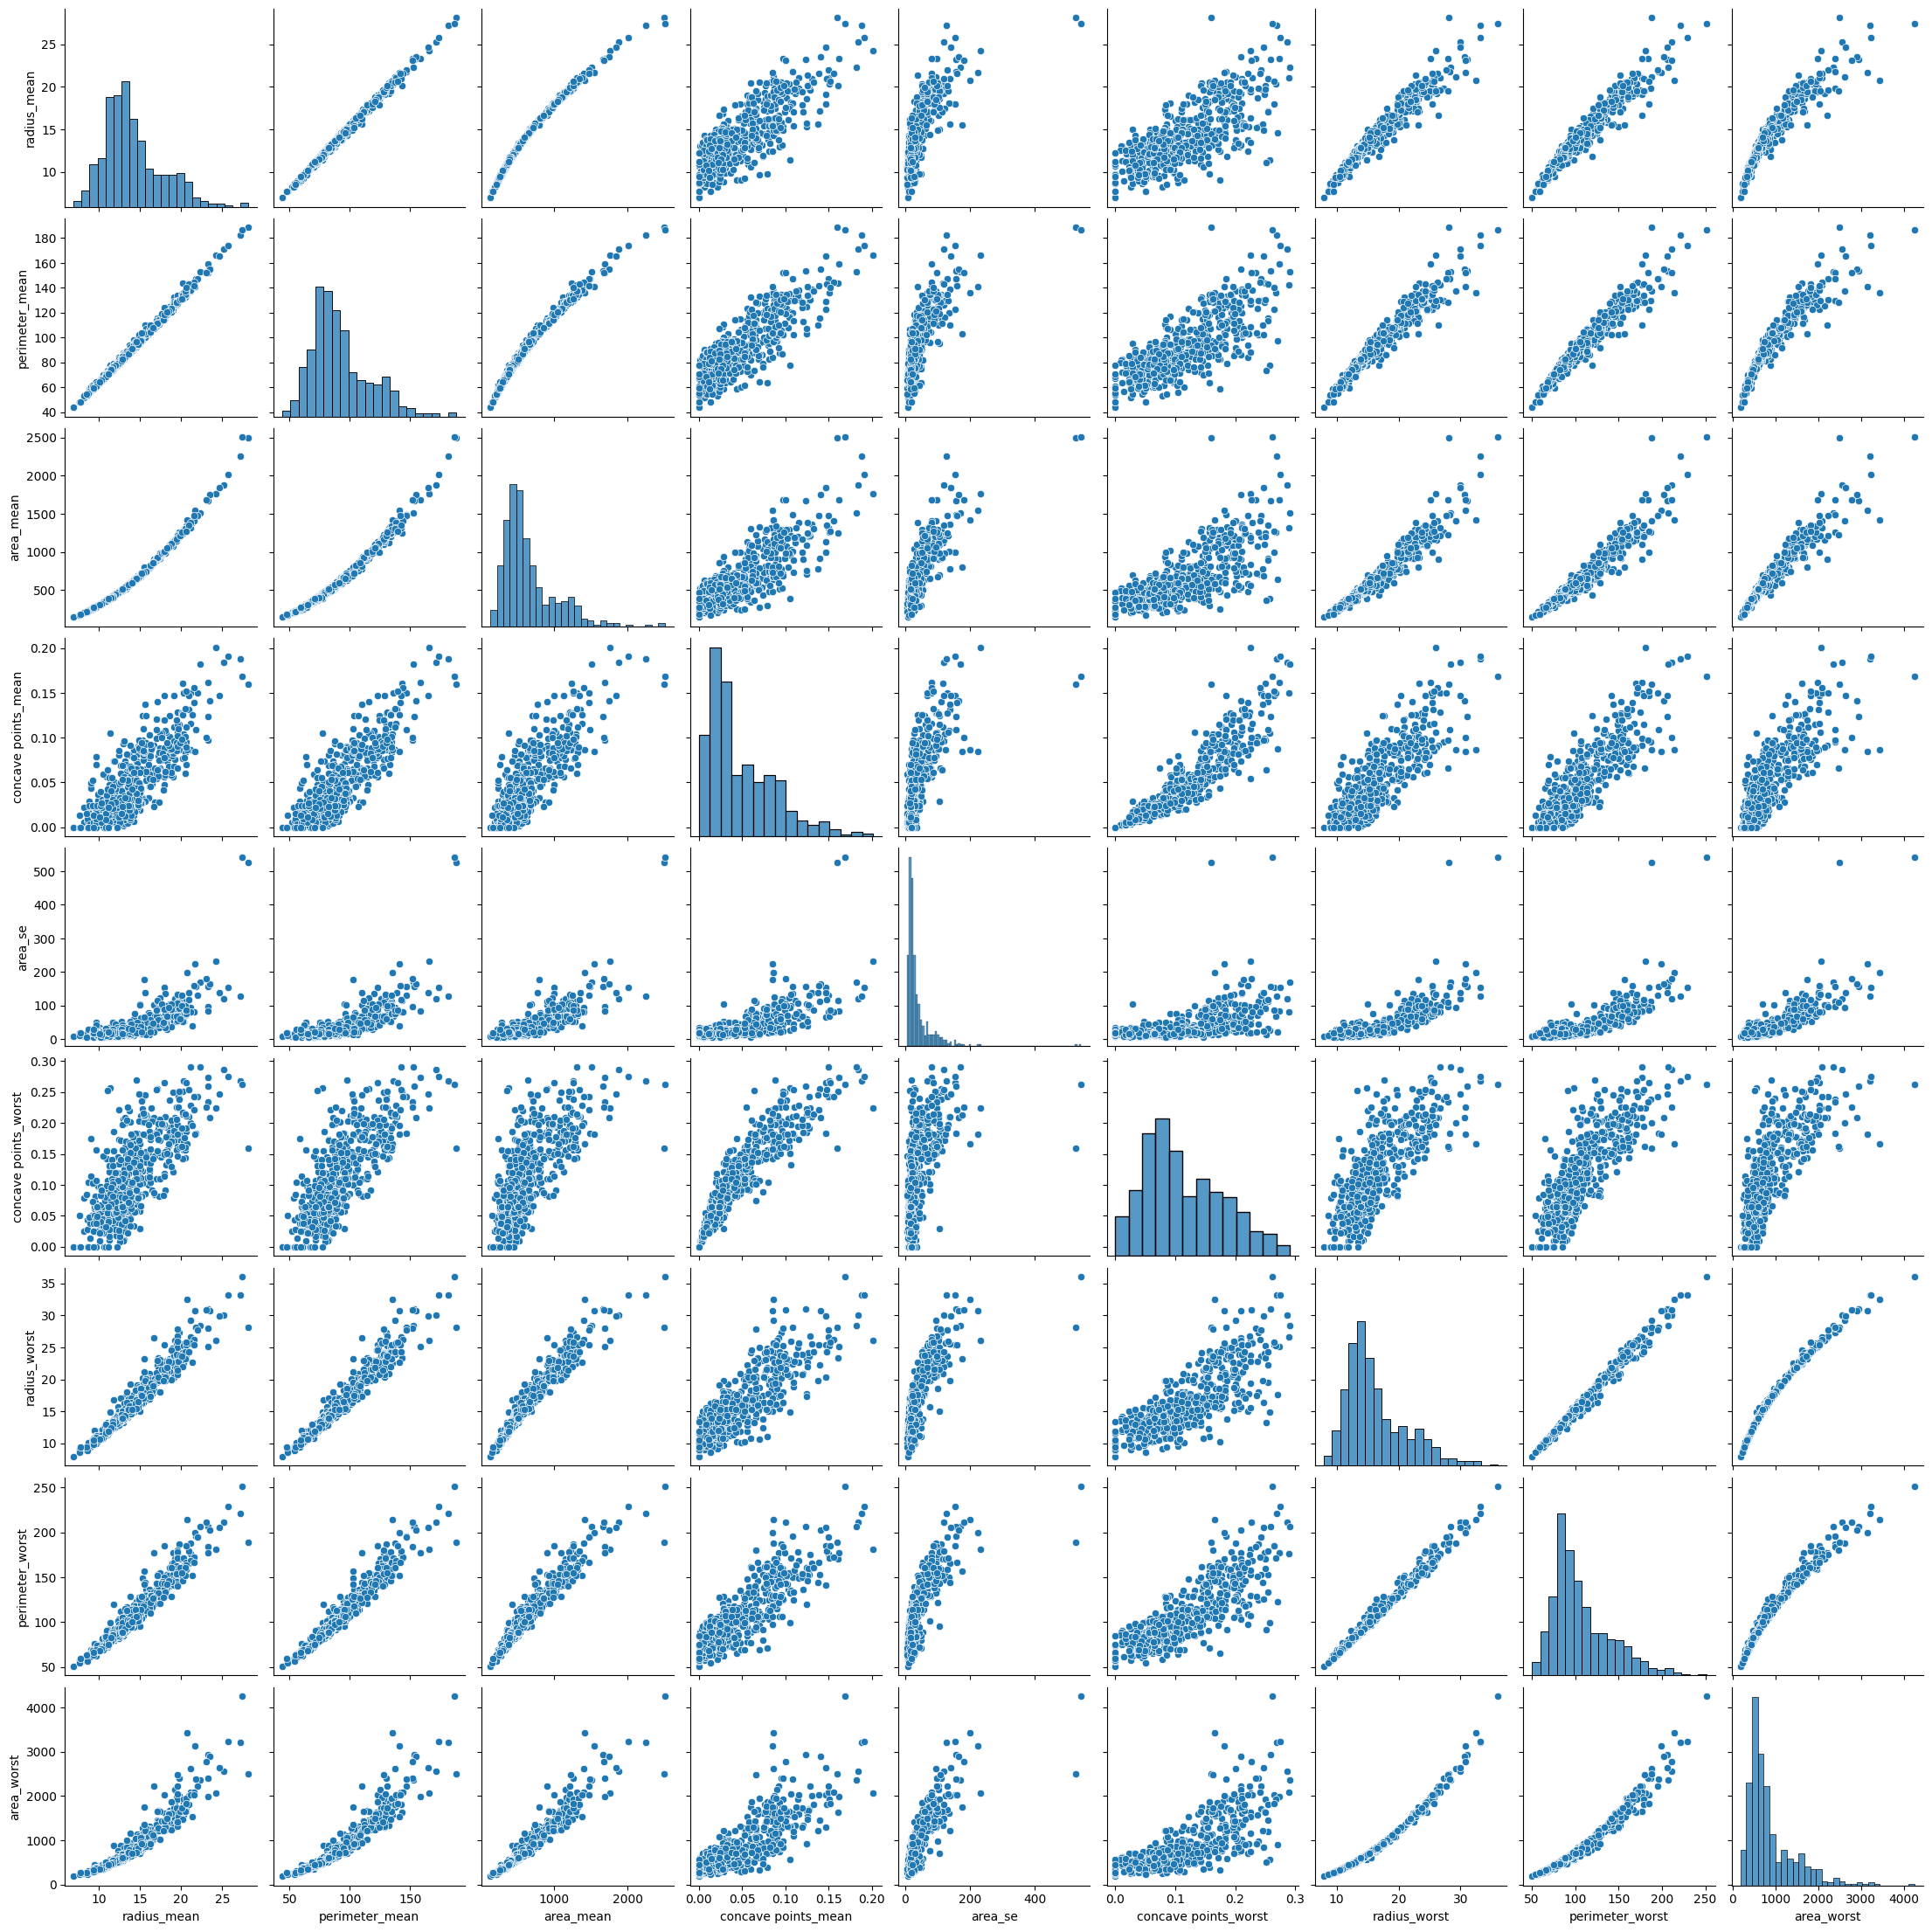

In [ ]:
# to test if their relationship is linearly correlated
import seaborn as sns

sns.pairplot(df_highcorr)
plt.show()

#### Understanding Feature Relationships & PCA Clustering
We plotted a **scatter plot matrix (pairplot)** to visually inspect how each feature relates to every other feature.

The diagonal shows **feature distributions**.

The off-diagonal scatter plots show **relationships** (linear, curved, or weak).

From the pairplot, we identified **strongly correlated groups** of features:

1. **Size group (mean)** → radius_mean, perimeter_mean, area_mean

2. **Size group (worst)** → radius_worst, perimeter_worst, area_worst

3. **Shape irregularity group** → compactness_mean, concavity_mean, concave_points_mean

### Why these?

* Features in each group are measuring similar underlying characteristics of the tumor.

* High correlation means redundancy — PCA can compress them into fewer components without losing much information.

### Why not all features?

* Applying PCA to everything together may mix unrelated signals and reduce interpretability.

* Group-wise PCA preserves meaning while still reducing dimensionality.

In [ ]:
# grouping columns for PCA
g1 = df_highcorr[df_highcorr.columns[0:3]]
g2 = df_highcorr[df_highcorr.columns[3:6]]
g3 = df_highcorr[df_highcorr.columns[6:9]]

### 2. For Moderately Correlated Features

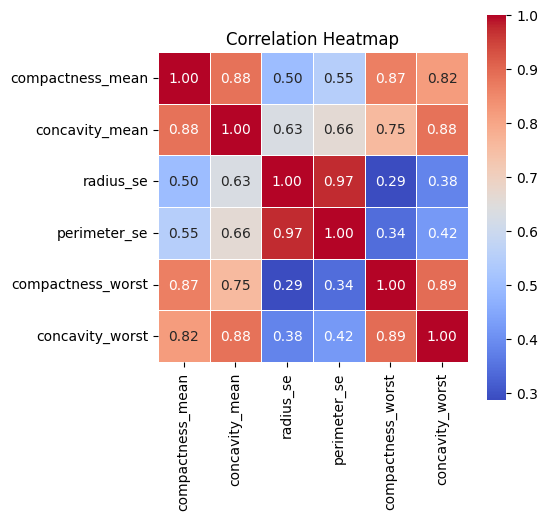

In [ ]:
# heatmap for moderately correlated features
cols_midcorr = ['compactness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'compactness_worst', 'concavity_worst']
df_midcorr = df[cols_midcorr]

# Compute correlation matrix
corr = df_midcorr.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

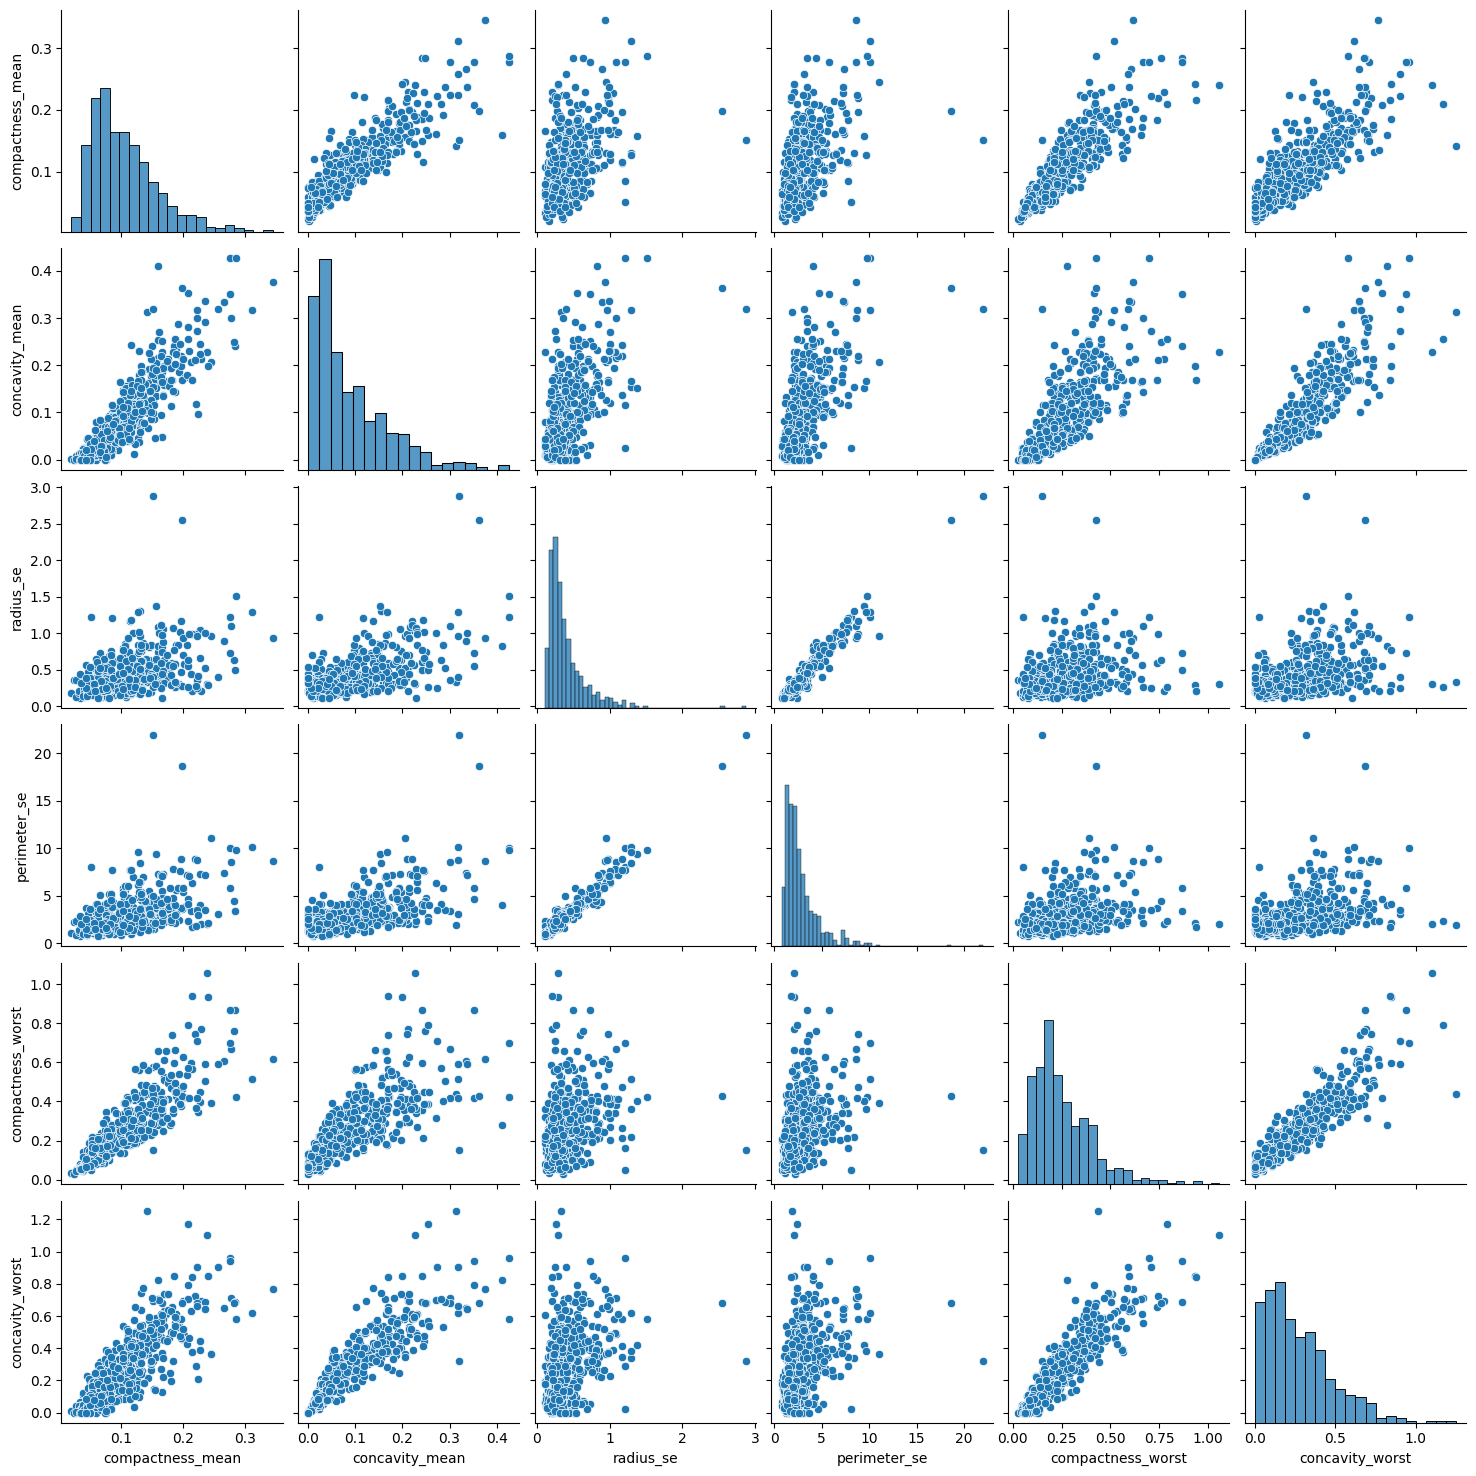

In [ ]:
# to test if their relationship is linearly correlated
sns.pairplot(df_midcorr)
plt.show()

#### **PCA Grouping & Projection Overview**

We grouped features based on strong correlations observed in the scatter plot matrix:

| Group | Features | Reason for Grouping | PCA Outcome |
|-------|----------|---------------------|-------------|
| **Shape Irregularity (Mean)** | `compactness_mean`, `concavity_mean` | Strong positive correlation; both describe average tumor shape irregularity | 1 PC |
| **Shape Irregularity (Worst)** | `compactness_worst`, `concavity_worst` | Strong positive correlation; both describe maximum tumor shape irregularity | 1 PC |
| **Size Variability** | `radius_se`, `perimeter_se` | Strong correlation; both describe variation in tumor size | 1 PC |

---

In [ ]:
df_midcorr.columns

Index(['compactness_mean', 'concavity_mean', 'radius_se', 'perimeter_se',
       'compactness_worst', 'concavity_worst'],
      dtype='object')

In [ ]:
# grouping columns for PCA
g4 = df_midcorr[df_midcorr.columns[0:2]]
g5 = df_midcorr[df_midcorr.columns[2:4]]
g6 = df_midcorr[df_midcorr.columns[4:6]]

### 3. For low correlated features

In [ ]:
all_features = list(df.columns)
remaining_cols = list(set(all_features) - set(cols_highcorr) - set(cols_midcorr))
remaining_cols.remove('diagnosis')
remaining_cols

['texture_worst',
 'fractal_dimension_worst',
 'fractal_dimension_mean',
 'smoothness_worst',
 'concave points_se',
 'symmetry_mean',
 'fractal_dimension_se',
 'smoothness_mean',
 'texture_se',
 'smoothness_se',
 'texture_mean',
 'concavity_se',
 'symmetry_se',
 'compactness_se',
 'symmetry_worst']

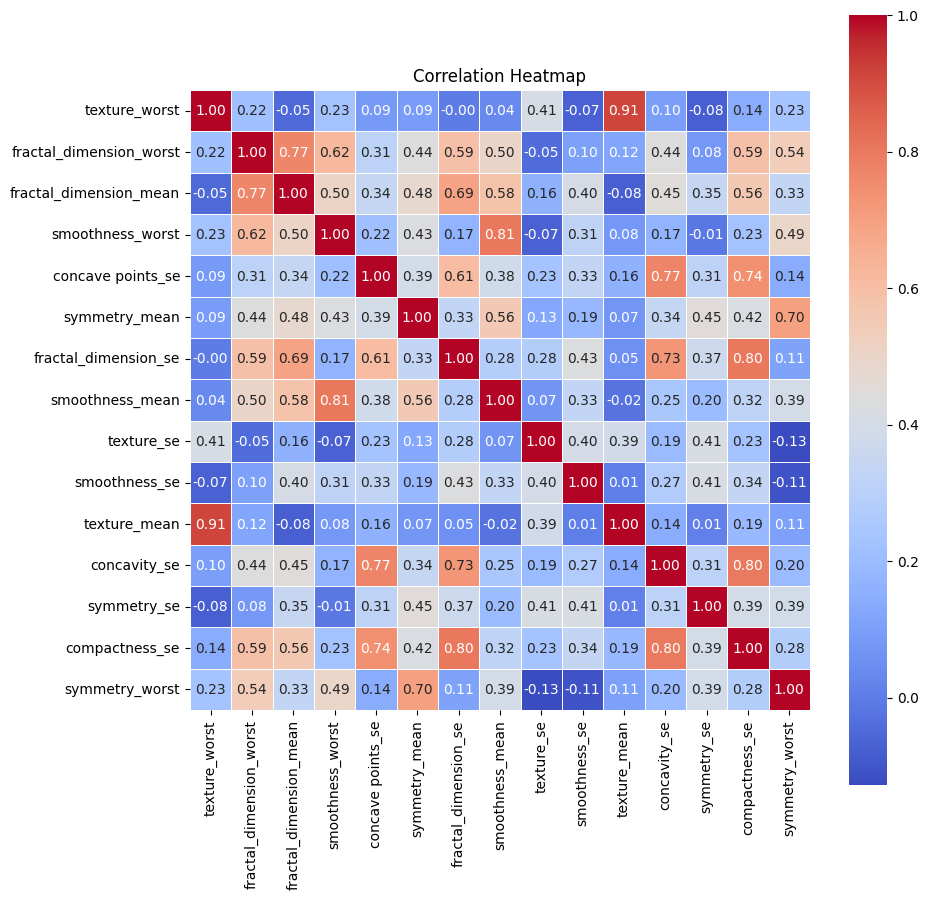

In [ ]:
# heatmap for features with low correlation
df_lowcorr = df[remaining_cols]

# Compute correlation matrix
corr = df_lowcorr.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
g7_col = ['texture_worst', 'texture_mean']
g8_col = ['fractal_dimension_worst', 'fractal_dimension_mean']
g9_col = ['smoothness_worst', 'smoothness_mean']
g10_col = ['symmetry_worst', 'symmetry_mean']
g11_col = ['fractal_dimension_se', 'concavity_se', 'compactness_se']
g12_col = ['concave points_se', 'concavity_se', 'compactness_se']
g7 = df_lowcorr[g7_col]
g8 = df_lowcorr[g8_col]
g9 = df_lowcorr[g9_col]
g10 = df_lowcorr[g10_col]
g11 = df_lowcorr[g11_col]
g12 = df_lowcorr[g12_col]

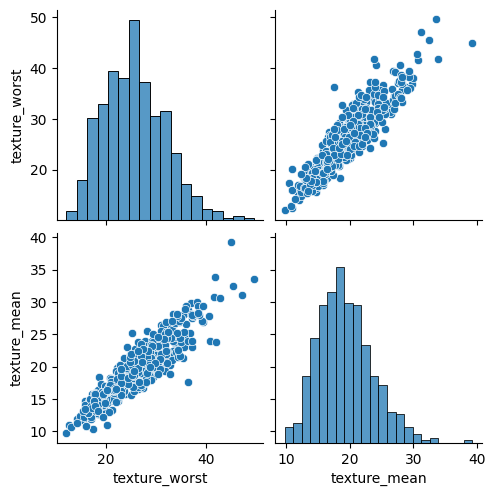

In [ ]:
# to test if their relationship is linearly correlated
sns.pairplot(g7)
plt.show()

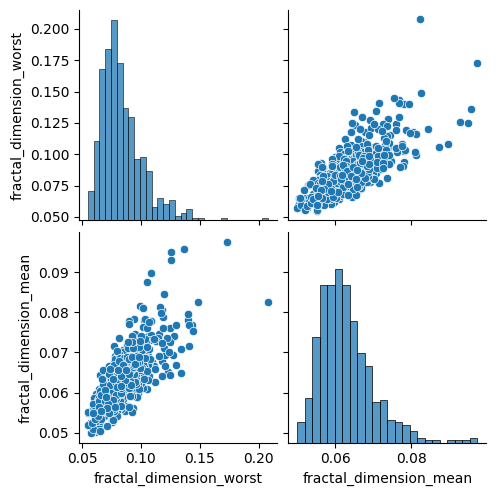

In [ ]:
# to test if their relationship is linearly correlated
sns.pairplot(g8)
plt.show()

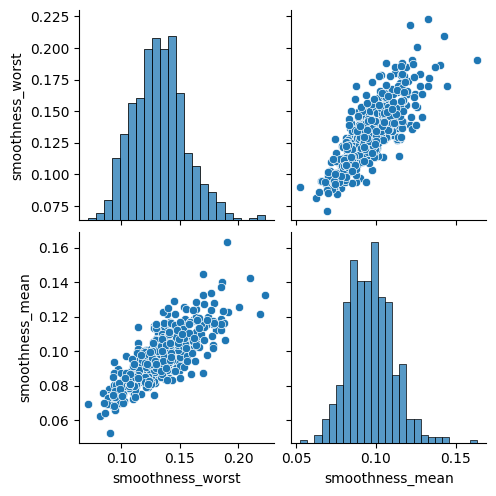

In [ ]:
# to test if their relationship is linearly correlated
sns.pairplot(g9)
plt.show()

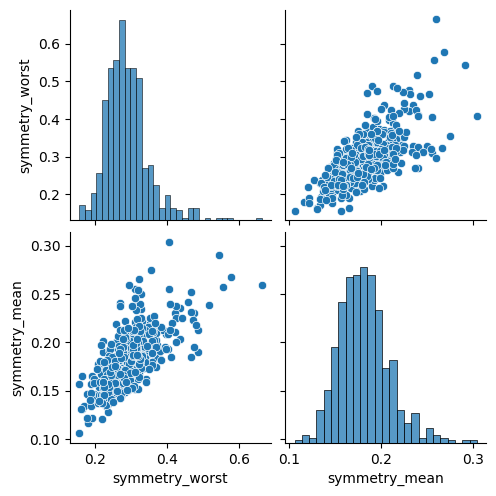

In [ ]:
# to test if their relationship is linearly correlated
sns.pairplot(g10)
plt.show()

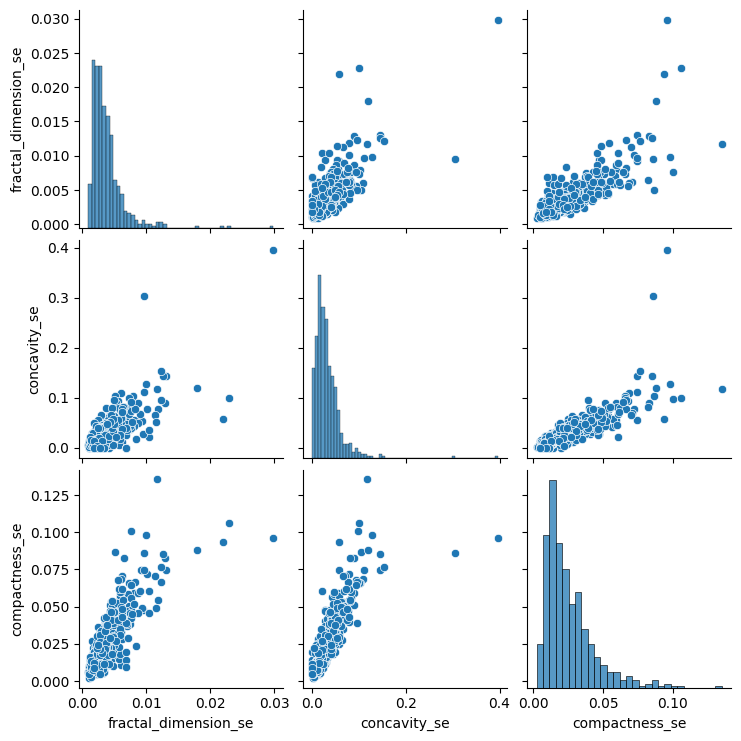

In [ ]:
# to test if their relationship is linearly correlated
sns.pairplot(g11)
plt.show()

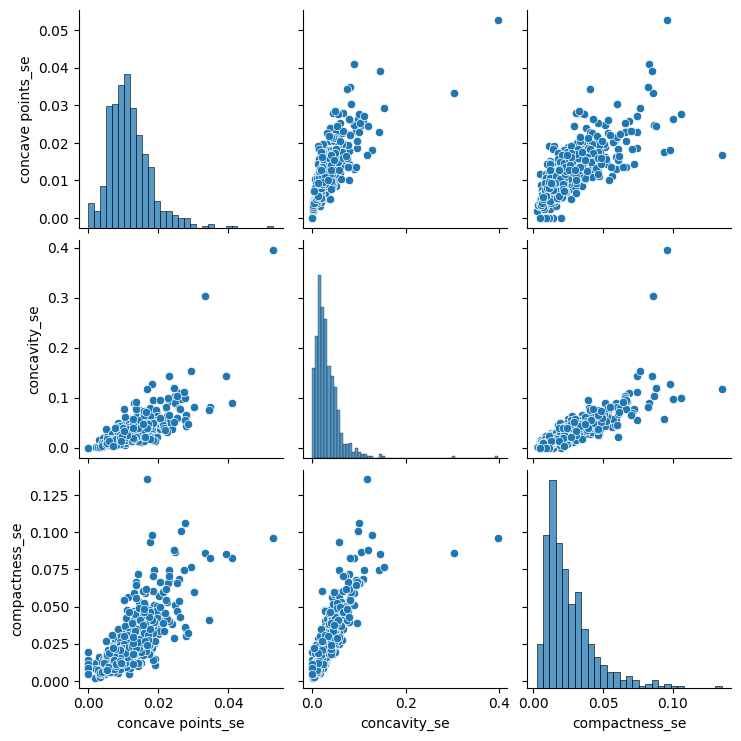

In [ ]:
# to test if their relationship is linearly correlated
sns.pairplot(g12)
plt.show()

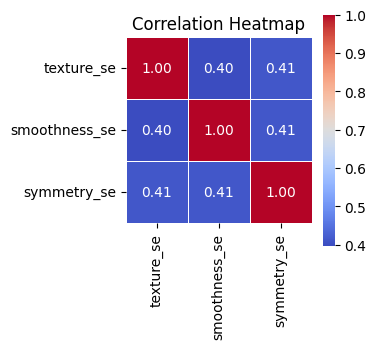

In [ ]:
# heatmap for features with low correlation
df_no_corr = df[['texture_se', 'smoothness_se', 'symmetry_se']]

# Compute correlation matrix
no_corr = df_no_corr.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(no_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

* All of thes features that we grouped together have strong linear correlation between them.
* Hence, we will apply PCA on all of these groups.
* We are now left with three columns, `texture_se`, `smootheness_se` and `symmetry_se`, and all of these have a moderate correlation. However, throughtout the process of applying PCA, we have grouped together the features which had **high-correlation** (<= 70%), which is not the case here.
* Therefore, we will leave these features the way they.

### Applying PCA on all grouped features


In [ ]:
#applying PCA
PCA_g1 = PCA(g1, 1)
PCA_g2 = PCA(g2, 1)
PCA_g3 = PCA(g3, 1)
PCA_g4 = PCA(g4, 1)
PCA_g5 = PCA(g5, 1)
PCA_g6 = PCA(g6, 1)
PCA_g7 = PCA(g7, 1)
PCA_g8 = PCA(g8, 1)
PCA_g9 = PCA(g9, 1)
PCA_g10 = PCA(g10, 1)
PCA_g11 = PCA(g11, 1)
PCA_g12 = PCA(g12, 1)

In [ ]:
df_PCA = pd.concat([PCA_g1, PCA_g2, PCA_g3, PCA_g4, PCA_g5, PCA_g6, PCA_g7, PCA_g8, PCA_g9,
                    PCA_g10, PCA_g11, PCA_g12, df_no_corr, df['diagnosis']], axis = 1)
df_PCA

,PC1,PC1,PC1,PC1,PC1,PC1,PC1,PC1,PC1,PC1,PC1,texture_se,smoothness_se,symmetry_se,diagnosis
0,-0.731252,5.745703,-0.271121,-5.763893,-0.597661,-11.907322,0.038134,0.036775,0.180529,0.030410,0.030594,0.9053,0.006399,0.03003,1
1,-0.132155,0.528076,0.015299,-0.545571,0.064594,-2.729371,0.002977,-0.013126,-0.014256,-0.017532,-0.017131,0.7339,0.005225,0.01389,1
2,-0.358671,1.729054,-0.121505,-1.748879,-0.244304,0.977280,0.002612,0.016940,0.075720,0.012524,0.013647,0.7869,0.006150,0.02250,1
3,-0.135330,0.612816,-0.224800,-0.585816,-0.695764,1.292639,0.095366,0.090091,0.379073,0.045055,0.045345,1.1560,0.009110,0.05963,1
4,-0.367383,2.572803,-0.107576,-2.595907,-0.074210,-10.233412,-0.008032,0.006310,-0.050888,0.021720,0.022470,0.7813,0.011490,0.01756,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.783418,4.805490,-0.137417,-4.866678,-0.086568,2.336858,-0.014185,0.014645,-0.082340,0.019351,0.021004,1.2560,0.010300,0.01114,1
565,-0.362296,2.334337,-0.046214,-2.364074,-0.003252,15.434571,-0.019013,-0.013096,-0.033040,0.006050,0.006797,2.4630,0.005769,0.01898,1
566,-0.050532,0.562668,-0.002053,-0.560803,-0.087520,11.919551,-0.007391,-0.021878,-0.071774,0.019122,0.019497,1.0750,0.005903,0.01318,1
567,-0.380505,2.947799,-0.314216,-2.922837,-0.900234,17.008911,0.040401,0.038934,0.131169,0.051650,0.051761,1.5950,0.006522,0.02324,1


In [ ]:
df_PCA_X = df_PCA.drop('diagnosis', axis = 1)
df_PCA_Y = df_PCA['diagnosis']

## Training models in the following order:

In [ ]:
models = ClassificationModels()

### Logistic Regression

In [ ]:
logisticRegression = models.logisticRegression(df_PCA_X, df_PCA_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       107
           1       0.92      0.92      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171


confusion matrix: 
 [[102   5]
 [  5  59]]

accuracy :  0.9415204678362573


### Support Vector Machine

In [ ]:
svm = models.svm(df_PCA_X, df_PCA_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.88      0.92      0.90        64

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171


confusion matrix: 
 [[99  8]
 [ 5 59]]

accuracy :  0.9239766081871345


### Decision Tree

In [ ]:
dt = models.decisionTree(df_PCA_X, df_PCA_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       107
           1       0.83      0.84      0.84        64

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171


confusion matrix: 
 [[96 11]
 [10 54]]

accuracy :  0.8771929824561403


### Naive Bayes

In [ ]:
nb = models.naiveBayes(df_PCA_X, df_PCA_Y)

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       107
           1       0.81      0.81      0.81        64

    accuracy                           0.86       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.86      0.86      0.86       171


confusion matrix: 
 [[95 12]
 [12 52]]

accuracy :  0.8596491228070176


# Conclusion of the Whole Process

PCA slightly improved the **recall** of our Decision Tree model, but overall its impact was minimal.  
The main reason is that PCA is most effective for **high-dimensional data**, whereas our dataset had only **30 features** and **569 rows** - making it relatively small.

For datasets of this size, dimension reduction (via PCA or column removal) is often unnecessary, especially if the computational resources required to train and use the model are not a concern.


### Best Result
Among the four models we trained, the **SVM model** trained on the complete dataset (without dimension reduction) performed the best.


### Key Learnings
- How to implement PCA from scratch.  
- How to reduce dimensions using PCA.  
- For small datasets, using all available features is often the best approach unless there’s a clear reason to simplify the feature space.


### When PCA is Worth It
- You have **high-dimensional data** (hundreds or thousands of features).  
- Many features are **highly correlated** (redundant information).  
- You want to **speed up training** or reduce storage requirements.  
- You need **lower-dimensional data** for visualization or interpretation.  
- You aim to **filter noise** by keeping only components that explain most of the variance.
